# Tratamiento de las variables categóricas

In [1]:
# Video 91

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')
data

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [4]:
# Se crearán 2 dummy datasets, uno para el género y otro para las ciudades

In [5]:
dummy_gender = pd.get_dummies(data['Gender'], prefix = 'Gender')
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix = 'City')

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
column_names = data.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
data_new = data[column_names].join(dummy_gender)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
column_names = data_new.columns.values.tolist()
data_new = data_new[column_names].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
# Variables predictoras
feature_columns = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male',
                  'City_Tier 1', 'City_Tier 2', 'City_Tier 3', 'Record']

In [12]:
# Parámetros para crear el modelo
X = data_new[feature_columns]
Y = data_new['Total Spend']

In [13]:
# Crear modelo
linear_model = LinearRegression()
linear_model.fit(X,Y)

LinearRegression()

In [14]:
# Intersección en Y y coeficientes de cada variable predictora
print(linear_model.intercept_)
print(linear_model.coef_)

-79.41713030136634
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
# Juntar variable con su respectivo coeficiente usando zip() en una lista
list(zip(feature_columns, linear_model.coef_))

[('Monthly Income', 0.14753898049205724),
 ('Transaction Time', 0.15494612549589348),
 ('Gender_Female', -131.0250132555455),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049547),
 ('City_Tier 2', 55.138974309232296),
 ('City_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445639)]

In [16]:
# Factor R2
linear_model.score(X,Y)

0.9179923586131016

In [17]:
# Factor R2 inicial muy bajo (0.1947) probablemente a la falta de variables e información. Se añadirán más variables para 
# ver si mejora, empezando con Record {desde arriba}

In [18]:
# R2 mejoró mucho (0.91799) al agregar 'Record'. ahora se añade Age

In [19]:
# R2 mejoró muy poco (0.91874) al agregar 'Record'. ahora se añade Age

El modelo puede escribirse como: 
* Total Spend = -79.41713030136634 + Monthly Income(0.14753898049205724) + Transaction Time(0.15494612549589348) + Gender_Female(-131.0250132555455) + Gender_Male(131.02501325554587) + City_Tier 1(76.76432601049547) + City_Tier 2(55.138974309232296) + City_Tier 3(-131.90330031972775) + Record(772.2334457445639)

In [20]:
# Agregando manualmente la columna predecida (también se puede hacer con loops o la función predict)
data_new['Prediction'] = -79.41713030136634 + data_new['Monthly Income'] * (0.14753898049205724) + data_new['Transaction Time'] * (0.15494612549589348) + data_new['Gender_Female'] * (-131.0250132555455) + data_new['Gender_Male'] * (131.02501325554587) + data_new['City_Tier 1'] * (76.76432601049547) + data_new['City_Tier 2'] * (55.138974309232296) + data_new['City_Tier 3'] * (-131.90330031972775) + data_new['Record'] * (772.2334457445639)
data_new['Prediction']

0       4903.696720
1       4799.434826
2       5157.082504
3       8068.012996
4       3581.980335
           ...     
2357    3336.456655
2358    8069.348522
2359    9050.690358
2360    8220.596094
2361    6814.313090
Name: Prediction, Length: 2362, dtype: float64

In [21]:
# Usando la función predict() con las columnas anteriores
data_new['Prediction'] = linear_model.predict(data_new[feature_columns])
data_new['Prediction']

0       4903.696720
1       4799.434826
2       5157.082504
3       8068.012996
4       3581.980335
           ...     
2357    3336.456655
2358    8069.348522
2359    9050.690358
2360    8220.596094
2361    6814.313090
Name: Prediction, Length: 2362, dtype: float64

In [22]:
data_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


In [23]:
SSD = np.sum((data_new['Prediction'] - data_new['Total Spend']) ** 2)
SSD

1517733985.340816

In [24]:
RSE = np.sqrt(SSD / (len(data_new) - len(feature_columns) - 1))
RSE

803.1318809818165

In [25]:
sales_mean = np.mean(data_new['Total Spend'])
sales_mean

6163.176415976715

In [26]:
error = RSE / sales_mean
error * 100

13.03113568029416

## Eliminar variables dummy redundantes

In [27]:
dummy_gender = pd.get_dummies(data['Gender'], prefix = 'Gender').iloc[:,1:]
# Tambien puede hacerse con:
# pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True) donde se elimina la primera columna

dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [28]:
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix = 'City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [29]:
column_names = data.columns.values.tolist()
data_new = data[column_names].join(dummy_gender).join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [30]:
# Variables predictoras
feature_columns = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']

# Parámetros para crear el modelo
X = data_new[feature_columns]
Y = data_new['Total Spend']

# Crear modelo
linear_model = LinearRegression()
linear_model.fit(X,Y)

# Intersección en Y y coeficientes de cada variable predictora
print(linear_model.intercept_)
list(zip(feature_columns, linear_model.coef_))

-133.6778175464151


[('Monthly Income', 0.14753898049205724),
 ('Transaction Time', 0.15494612549589926),
 ('Gender_Male', 262.05002651109345),
 ('City_Tier 2', -21.625351701264158),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.233445744563)]

In [31]:
# Factor R2
linear_model.score(X,Y)

0.9179923586131016

In [32]:
# El modelo es igual al anterior sólo que la información se ha reducido quitando las variables 
# redundantes como Gender_Female y City_Tier_1

Coeficientes con todas las variables en el modelo:
* -79.41713030136634
* ('Monthly Income', 0.14753898049205724),
* ('Transaction Time', 0.15494612549589348),
* ('Gender_Female', -131.0250132555455),
* ('Gender_Male', 131.02501325554587),
* ('City_Tier 1', 76.76432601049547),
* ('City_Tier 2', 55.138974309232296),
* ('City_Tier 3', -131.90330031972775),
* ('Record', 772.2334457445639)

Coeficientes después de enmascarar variables dummy redundantes:
* -133.6778175464151
* ('Monthly Income', 0.14753898049205724),
* ('Transaction Time', 0.15494612549589926),
* ('Gender_Male', 262.05002651109345),
* ('City_Tier 2', -21.625351701264158),
* ('City_Tier 3', -208.6676263302229),
* ('Record', 772.233445744563)

Los cambios se reflejan en las variables dummy:
* Gender Male  antes: -> 131.02, después: -> 131.02 - (-131.02) = 261.05
* Gender Female
* CT1, CT2 y CT3

# Transformación de variables para conseguir una relación no lineal

In [33]:
# Video 94

In [34]:
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("../datasets/auto/auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [36]:
data.shape

(406, 9)

Text(0.5, 1.0, 'HP vs MPG')

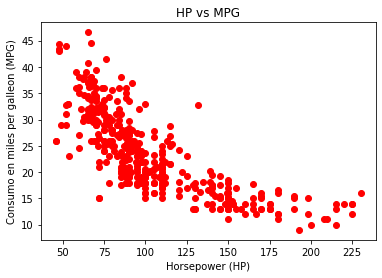

In [37]:
data['mpg'] = data['mpg'].dropna()
data['horsepower'] = data['horsepower'].dropna()
plt.plot(data['horsepower'], data['mpg'], 'ro')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Consumo en miles per galleon (MPG)')
plt.title('HP vs MPG')

## Modelo de regresión lineal
* mps = a + b * HorsePower

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Debido al inline anterior, los NAs no se han eliminado, por lo que se rellenarán a continuación

X = data['horsepower'].fillna(data['horsepower'].mean())
Y = data['mpg'].fillna(data['mpg'].mean())

In [40]:
# Como LinearRegression sólo acepta datos de tipo dataframe o arrays bidimensionales, se agregará un nuevo axis 
# (para que sea columna) puesto que X es sólo un vector o array unidimensional

X_data = X[:, np.newaxis]

linear_model = LinearRegression()
linear_model.fit(X_data,Y)

LinearRegression()

In [41]:
# X es sólo una serie de números
type(X)

pandas.core.series.Series

In [42]:
# X es un array n-dimensional
type(X[:,np.newaxis])

numpy.ndarray

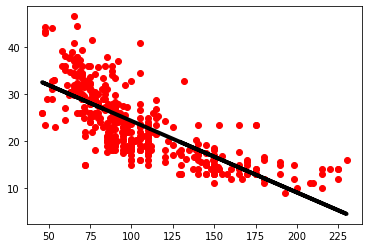

In [43]:
plt.plot(X_data, Y, 'ro')
plt.plot(X_data, linear_model.predict(X_data), 'k', linewidth = '4')

In [44]:
linear_model.score(X_data,Y)

0.5746533406450252

In [45]:
SSD = np.sum((Y - linear_model.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) -1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

In [46]:
linear_model.coef_

array([-0.15244505])

In [47]:
linear_model.intercept_

39.5338798290345

# Modelo de regresión cudrático
* mps = a + b * HorsePower^2

In [48]:
import matplotlib.pyplot as plt

In [49]:
# Usando variable cuadrática

X_data = X**2
X_data = X_data[:, np.newaxis]

# Y sigue siendo igual ya que la variable a predecir no ha cambiado

In [50]:
linear_model = LinearRegression()
linear_model.fit(X_data,Y)

LinearRegression()

In [51]:
linear_model.score(X_data,Y)

0.4849887034823205

In [52]:
# El score deja mayor margen de mejora al anterior

In [53]:
SSD = np.sum((Y - linear_model.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) -1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

In [54]:
# El error aumentó un poco

# Modelo de regresión lineal y cudrático
* mps = a + b * HorsePower + c * HorsePower^2

In [55]:
# Al usar un modelo con funcionalidades polinomiales o más rasgos, hay que importar otro paquete de sklearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [56]:
# Usando los mismos datos
X = data['horsepower'].fillna(data['horsepower'].mean())
Y = data['mpg'].fillna(data['mpg'].mean())

In [57]:
# Se usará un polinomio de grado 2
poly = PolynomialFeatures(degree = 2)

In [58]:
# Usando el polinomio de grado 2 se usa el método fit_transform para hacer la transformación lineal a partir
# de los datos originales
X_data = poly.fit_transform(X[:, np.newaxis])

In [59]:
# Ahora sí se implementa la regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_data, Y)

LinearRegression()

In [60]:
linear_model.score(X_data, Y)

0.6439066584257469

In [61]:
# El score aumentó un poco y ha sido el más alto

In [62]:
linear_model.intercept_

55.02619244708123

In [63]:
linear_model.coef_

array([ 0.        , -0.43404318,  0.00112615])

El modelo resultante sería:
* mps = a - 0.43404318*HP* + 0.00112615*HP*^2

In [69]:
# Para probar con mayores exponentes se puede usar un for

for d in range(2,11):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    
    linear_model = LinearRegression()
    linear_model.fit(X_data, Y)
    
    print('Con grado ' + str(d) + ', el score es:')
    print(linear_model.score(X_data, Y))
    print(linear_model.intercept_)
    print(linear_model.coef_)
    regression_validation(linear_model, X_data,Y)
    print()

Con grado 2, el score es:
0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
8636.180643524502 4.61778115803654 23.514572864321607 19.6379546619069

Con grado 3, el score es:
0.6444678885560742
58.44877411148398
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
8622.569367428552 4.614140736300908 23.514572864321607 19.622473106036686

Con grado 4, el score es:
0.6467674189704501
40.096643856249585
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
8566.799832491355 4.5991947315797574 23.514572864321607 19.55891250126879

Con grado 5, el score es:
0.6547512491848168
-40.69399214088948
[ 0.00000000e+00  4.00021885e+00 -7.54802455e-02  6.19621632e-04
 -2.36220981e-06  3.41983064e-09]
8373.171387618786 4.546921733808459 23.514572864321607 19.336612066245316

Con grado 6, el score es:
0.6572738349328324
-156.9690834522047
[ 0.00000000e+00  1.07601453e+01 -2.30132274e-01  2.40564875e-03
 -1.33790937e-05  3.79770576e-08 -

In [66]:
# El mayor es grado 5, pero apenas sube, por lo que el R2 no mejora significativamente al aumentar de grado
# Por lo tanto, se puede quedar el más simple (grado 2)

In [67]:
def regression_validation(linear_model, X_data, Y):
    
    SSD = np.sum((Y - linear_model.predict(X_data))**2)
    RSE = np.sqrt(SSD / (len(X_data) -1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    
    print(SSD, RSE, y_mean, error*100)    

Text(0.5, 1.0, 'Relación potencia - consumo')

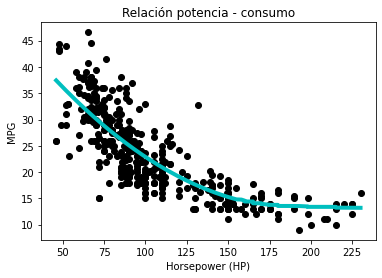

In [68]:
# Gráfica usando polinomio de grado 2
poly = PolynomialFeatures(degree = 2)
X_data = poly.fit_transform(X[:, np.newaxis])

linear_model = LinearRegression()
linear_model.fit(X_data, Y)

# Para hacer el plot se necesita ordenar los datos en la X original
X_sorted = sorted(X, reverse = True)

# Predicción de puntos en Y usando los datos X_data
# También se requiere ordenar para no obtener una línea fea
y_predict = sorted(linear_model.predict(X_data))

# Plot de puntos originales
plt.scatter(data['horsepower'], data['mpg'], color = 'black')

# Plot del modelo
plt.plot(X_sorted, y_predict, 'c', linewidth = '4')

plt.xlabel('Horsepower (HP)')
plt.ylabel('MPG')
plt.title('Relación potencia - consumo')

# El problema de los outliers
Los outliers son los puntos o valores que se encuentran alejados de toda la nube de puntos, que aunque sean pocos, pueden alterar bastante nuestro modelo.

In [70]:
# Video 95

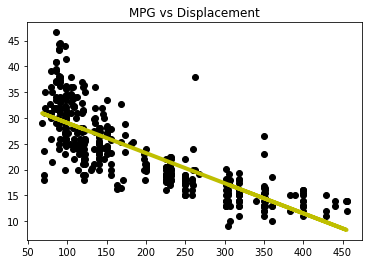

In [91]:
# Usando ahora el desplazamiento del auto y las mpg
X = data['displacement'].fillna(data['displacement'].mean())
X = X[: , np.newaxis]
Y = data['mpg'].fillna(data['mpg'].mean())

plt.scatter(data['displacement'], data['mpg'], color = 'black')
plt.title('MPG vs Displacement')

linear_model = LinearRegression()
linear_model.fit(X,Y)

plt.plot(X, linear_model.predict(X), 'y', linewidth = '4')

In [86]:
linear_model.score(X,Y)

0.6261049762826918

In [95]:
# Para obtener algunos outliers se pueden usar condicionales
data[(data['displacement'] > 250) & (data['mpg'] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [96]:
# Para obtener algunos outliers
data[(data['displacement'] > 300) & (data['mpg'] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [97]:
# Ahora, para eliminar esos outliers del dataset
data_clean = data.drop([395, 258, 305, 372])

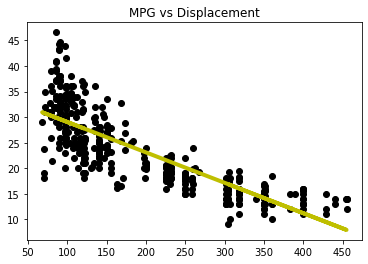

In [100]:
# Volvemos a plotear usando el nuevo dataset para verificar que se eliminaron los outliers y revisar el score


X = data_clean['displacement'].fillna(data_clean['displacement'].mean())
X = X[: , np.newaxis]
Y = data_clean['mpg'].fillna(data_clean['mpg'].mean())

plt.scatter(data_clean['displacement'], data_clean['mpg'], color = 'black')
plt.title('MPG vs Displacement')

linear_model = LinearRegression()
linear_model.fit(X,Y)

plt.plot(X, linear_model.predict(X), 'y', linewidth = '4')

In [101]:
linear_model.score(X,Y)

0.6466514317531822

In [102]:
# Como se observa, se eliminaron los outliers y el score mejoró un poco. También hay que revisar los demás 
# estadísticos (F y P valores asociados) para tener razones estadísticas de peso para hacer estas eliminaciones

In [103]:
# También se pueden usar diagramas de caja para identificar outliers. Si los puntos pasan de 1.5 veces el intervalo
# intercuartílico por debajo del primer cuartíl o por encima del tercero son clasificados como outliers